# Linear Regreassion Using Pytorch

This tutorial will cover the process of developing a Regression Model using Pytorch.

1. **Regression Models** <br />
>Regression models helps in predicting future happenings between a dependent (target) and one or more independent variables (also known as a predictor).
Regression is one of the most common models of machine learning. The difference between Regression and Classification is that the first one predict a numerical value where the later identify the class an observation belong to.


![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/TypesOfRegressionModels.png?raw=1)

            Linear Regression                    Logistics Regression              Polynomial Regression


2. **Correlation and its relation to Regression**

$~~$
$$
  r= \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2\sum(y-\bar{y})^2}}
$$  


$\hspace{18pt}$ This equation represents the total correlation of observed values for two variables in a sample
population. In simple linear regression, this would reflect the relationship between the single explanatory variable and the response variable.
![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/correlationPlots.png?raw=1)

The correlation coefficients fall within a range of -1 to 1 where -1 is a perfectly negative correlation, 0 is no correlation, and 1 is a perfectly positive correlation. There are varying schools of thought on how to interpret these results but, generally speaking, values above .7 and below -.7 are regarded as red flags indicating possible collinearity. In such cases, further investigation should be made to ensure resulting linear models have minimal error.

4. **t-test**<br />
>The correlation coefficient, r , tells us about the strength and direction of the linear relationship between  x  and  y . However, the reliability of the linear model also depends on how many observed data points are in the sample. We need to look at both the value of the correlation coefficient  r  and the sample size  n , together. We perform a hypothesis test of the "significance of the correlation coefficient" to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/PopulationSample.png?raw=1)

If we had data for the entire population, we could find the population correlation coefficient. But because we have only sample data, we cannot calculate the population correlation coefficient. The sample correlation coefficient,  r , is our estimate of the unknown population correlation coefficient.
The symbol for the population correlation coefficient is  ρ
, the Greek letter "rho."ρ=  population correlation coefficient (unknown)
r=  sample correlation coefficient (known; calculated from sample data)
The hypothesis test lets us decide whether the value of the population correlation coefficient  ρ  is "close to zero" or "significantly different from zero". We decide this based on the sample correlation coefficient  r
and the sample size  n.
We will only be using the two-tailed test for a population correlation coefficient  ρ . The hypotheses are:

$\hspace{35pt}$H0: ρ=0

$\hspace{35pt}$H1: ρ≠0

The hypothesis test lets us decide whether the value of the population correlation coefficient  ρ  is "close to zero" or "significantly different from zero". We decide this based on the sample correlation coefficient  r  and the sample size  n.

The t-test is a statistical test for the correlation coefficient. It can be used when  x  and  y  are linearly related, the variables are random variables, and when the population of the variable  y  is normally distributed.

The formula for the t-test statistic is

$$
t= r*{\sqrt(\frac{df}{(1-r^2)}})
$$

where r is the correlation coeficient, n is the sample number and df = n-2.

  
###Jupyter Notebook




In Python code, the import statement will allow the current module to access the code of another model (somehow similar the include operation in C/C++).

When invoking the import statement, the current module serches for the named module and bind it to the name selected in the local scope.

Here we are importing:

 **matplotlib.pyplot :**

 **numpy :**

 **torch :**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from scipy.stats import pearsonr
from scipy import stats
import scipy

 **Synthetic data generation**

In [2]:
# Creating a function f(X) with a slope of 9 and an intercept of -3
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = 9 * X - 3

In [3]:
print(X.data)

tensor([[-5.0000e+00],
        [-4.9000e+00],
        [-4.8000e+00],
        [-4.7000e+00],
        [-4.6000e+00],
        [-4.5000e+00],
        [-4.4000e+00],
        [-4.3000e+00],
        [-4.2000e+00],
        [-4.1000e+00],
        [-4.0000e+00],
        [-3.9000e+00],
        [-3.8000e+00],
        [-3.7000e+00],
        [-3.6000e+00],
        [-3.5000e+00],
        [-3.4000e+00],
        [-3.3000e+00],
        [-3.2000e+00],
        [-3.1000e+00],
        [-3.0000e+00],
        [-2.9000e+00],
        [-2.8000e+00],
        [-2.7000e+00],
        [-2.6000e+00],
        [-2.5000e+00],
        [-2.4000e+00],
        [-2.3000e+00],
        [-2.2000e+00],
        [-2.1000e+00],
        [-2.0000e+00],
        [-1.9000e+00],
        [-1.8000e+00],
        [-1.7000e+00],
        [-1.6000e+00],
        [-1.5000e+00],
        [-1.4000e+00],
        [-1.3000e+00],
        [-1.2000e+00],
        [-1.1000e+00],
        [-1.0000e+00],
        [-9.0000e-01],
        [-8.0000e-01],
        [-7

In [4]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 6 * torch.randn(X.size())

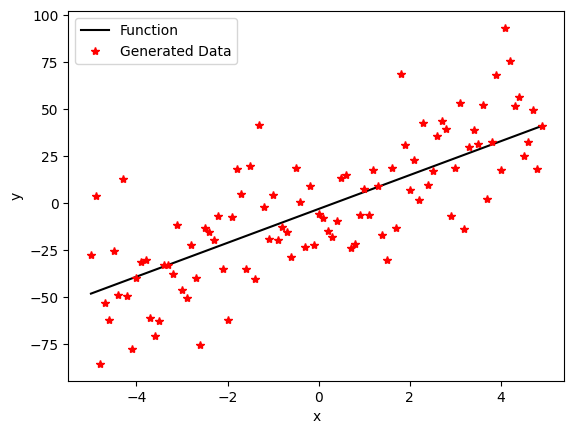

In [5]:
# Plot the line in black with the generated data in red
plt.plot(X.numpy(), func.numpy(), 'k', label='Function')
plt.plot(X.numpy(), Y.numpy(), 'r*', label='Generated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
correlationCoef, p_value = scipy.stats.pearsonr(X.numpy().flatten(), Y.numpy().flatten())
print(p_value)

2.132094314243425e-21


alpha = 0.05  
the probability of achieving the same or more extreme results assuming the null hypothesis is 5%. If the p-value is less than the specified alpha value, then we reject the null hypothesis. Hence, we reject the hypothesis that “population correlation coefficient ρ is closer to zero"

In [7]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

#What is a Tensor and what is used for ?
![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/Tensor.png?raw=1)

A tensor is a container which can house data in N dimensions.tensors are generalizations of matrices to N-dimensional space. In addition, Tensors include descriptions of the valid linear transformations between tensors (e.g dot product, corss product ...).
Although a scalar, 1D array and 2D array can be considered as Tensors but in machine learning we will generaly be talking about matrices of a dimension ≥ 3.

In [8]:
w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

In [9]:
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [10]:
step_size = 0.003
loss_list = []
iter = 1000

for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	4044.7578125, 	-9.01668643951416, 	-19.9019718170166
1, 	3727.3115234375, 	-8.082518577575684, 	-19.804237365722656
2, 	3440.511962890625, 	-7.195038795471191, 	-19.70680809020996
3, 	3181.373779296875, 	-6.351912975311279, 	-19.609697341918945
4, 	2947.202392578125, 	-5.550922870635986, 	-19.512916564941406
5, 	2735.56787109375, 	-4.789960861206055, 	-19.41647720336914
6, 	2544.27490234375, 	-4.067026138305664, 	-19.32038688659668
7, 	2371.343994140625, 	-3.380216121673584, 	-19.22465705871582
8, 	2214.987548828125, 	-2.727725028991699, 	-19.129295349121094
9, 	2073.593017578125, 	-2.1078362464904785, 	-19.03430938720703
10, 	1945.7042236328125, 	-1.5189197063446045, 	-18.939708709716797
11, 	1830.0076904296875, 	-0.9594264030456543, 	-18.84549903869629
12, 	1725.3175048828125, 	-0.42788517475128174, 	-18.751686096191406
13, 	1630.5640869140625, 	0.07710188627243042, 	-18.658275604248047
14, 	1544.7811279296875, 	0.5568625330924988, 	-18.565275192260742
15, 	1467.0972900390625, 	1

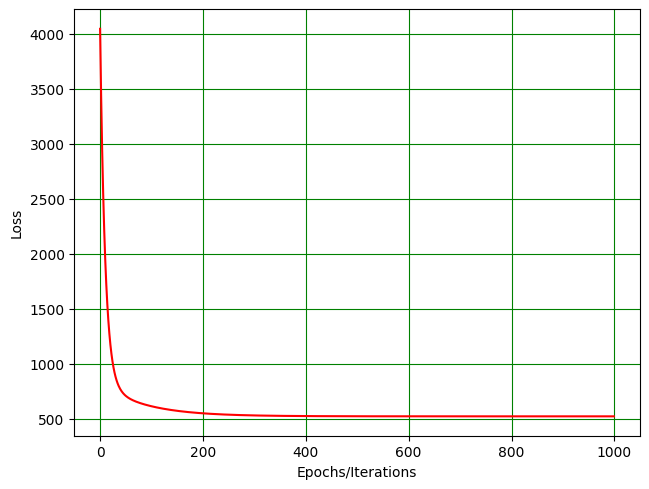

In [11]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='g')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [12]:
func_est = w.item() * X + b.item()

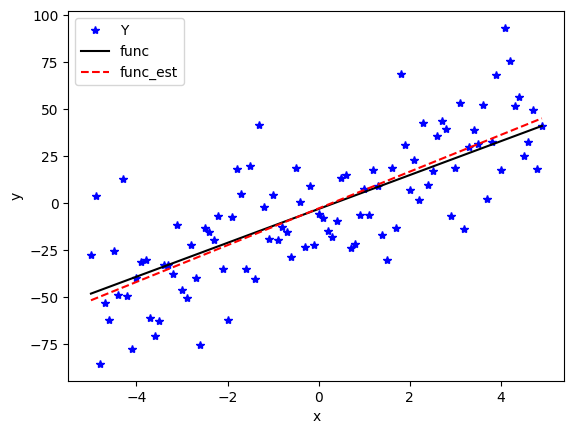

In [13]:
plt.plot(X.numpy(), Y.numpy(), 'b*', label='Y')
plt.plot(X.numpy(), func.numpy(), 'k', label='func')
plt.plot(X.numpy(), func_est.numpy(), 'r--', label='func_est')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
print('w={}, \tb={}'.format(w.item(), b.item()))

w=9.765989303588867, 	b=-2.716275691986084
